In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
from sklearn.datasets import load_diabetes

df = load_diabetes()

In [4]:
df.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [5]:
df.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:
X = pd.DataFrame(df.data, columns=df.feature_names)
y = df.target

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
17,0.070769,0.050680,0.012117,0.056301,0.034206,0.049416,-0.039719,0.034309,0.027364,-0.001078
66,-0.009147,0.050680,-0.018062,-0.033213,-0.020832,0.012152,-0.072854,0.071210,0.000272,0.019633
137,0.005383,-0.044642,0.049840,0.097615,-0.015328,-0.016345,-0.006584,-0.002592,0.017036,-0.013504
245,-0.027310,-0.044642,-0.035307,-0.029770,-0.056607,-0.058620,0.030232,-0.039493,-0.049872,-0.129483
31,-0.023677,-0.044642,-0.065486,-0.081413,-0.038720,-0.053610,0.059685,-0.076395,-0.037129,-0.042499


<Axes: >

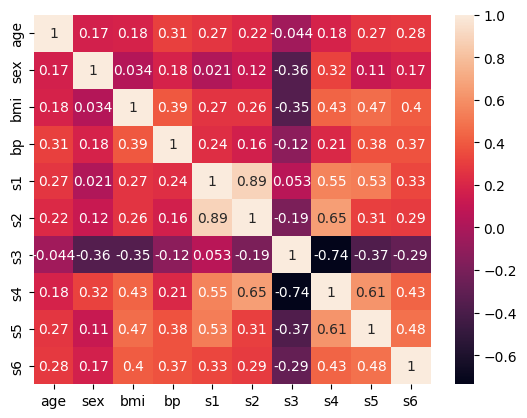

In [9]:
sns.heatmap(X_train.corr(), annot=True)

In [10]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [11]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'Model Accuracy: {r2_score(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')

MSE: 4944.876404494382
Model Accuracy: 0.0666789780268432
MAE: 55.68539325842696


[Text(0.6101677408429759, 0.975, 'bmi <= 0.005\nsquared_error = 6076.398\nsamples = 353\nvalue = 153.737'),
 Text(0.35664520860495436, 0.925, 's5 <= 0.006\nsquared_error = 3612.73\nsamples = 209\nvalue = 118.043'),
 Text(0.48340647472396514, 0.95, 'True  '),
 Text(0.19414113428943938, 0.875, 's5 <= -0.043\nsquared_error = 2378.339\nsamples = 152\nvalue = 100.559'),
 Text(0.09159061277705345, 0.825, 's1 <= -0.039\nsquared_error = 1425.414\nsamples = 49\nvalue = 80.878'),
 Text(0.059322033898305086, 0.775, 's1 <= -0.046\nsquared_error = 1663.902\nsamples = 28\nvalue = 94.75'),
 Text(0.02998696219035202, 0.725, 's6 <= -0.076\nsquared_error = 1058.16\nsamples = 24\nvalue = 84.083'),
 Text(0.005215123859191656, 0.675, 's1 <= -0.082\nsquared_error = 723.5\nsamples = 4\nvalue = 113.0'),
 Text(0.002607561929595828, 0.625, 'squared_error = 0.0\nsamples = 1\nvalue = 70.0'),
 Text(0.007822685788787484, 0.625, 'bmi <= -0.05\nsquared_error = 142.889\nsamples = 3\nvalue = 127.333'),
 Text(0.00521512

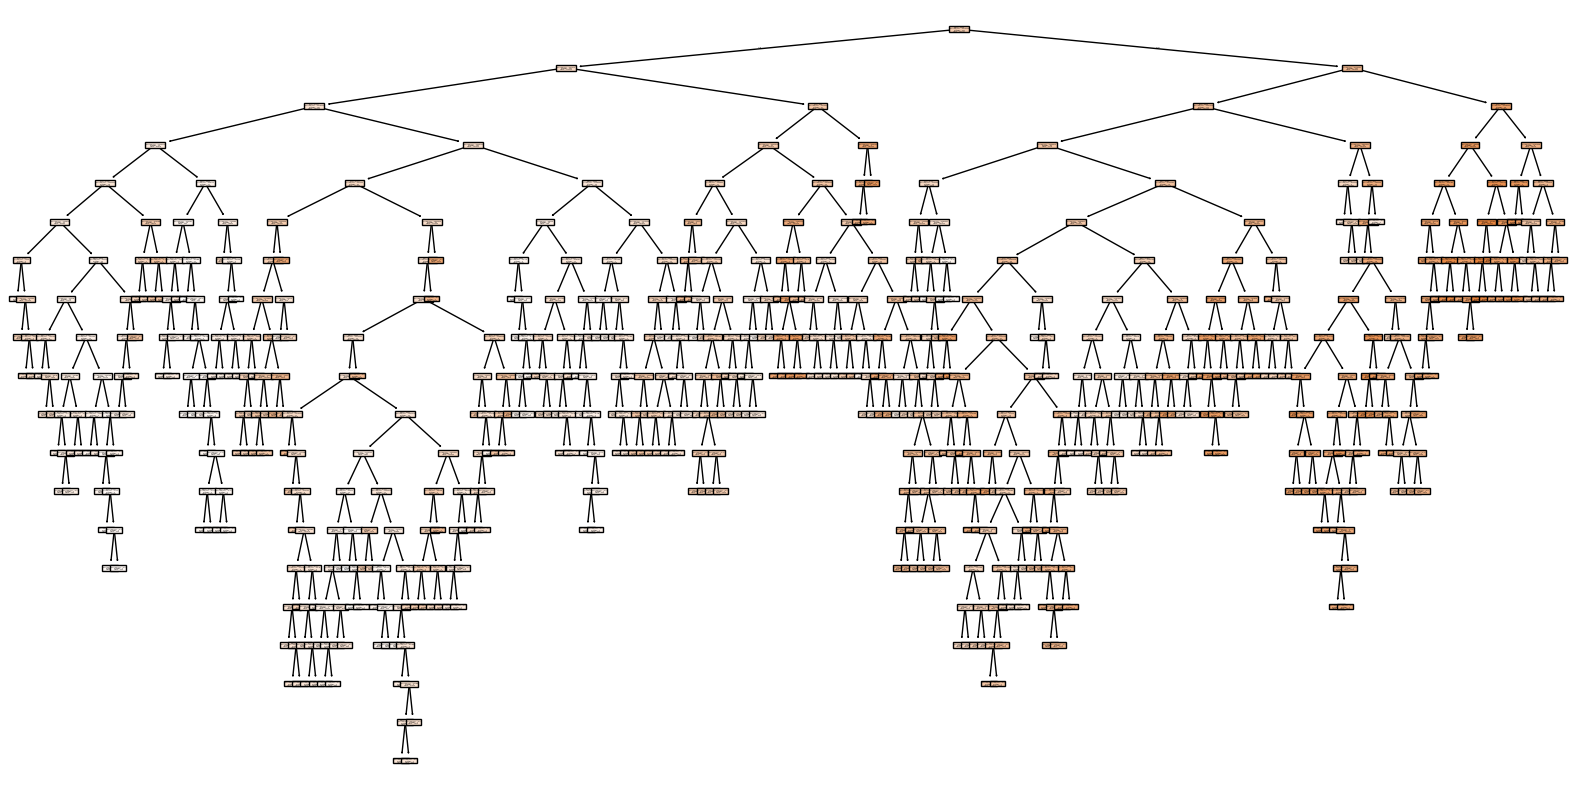

In [13]:
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns)